In [16]:
import numpy as np
from astropy.table import Table
from astropy.io import ascii
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
from scipy.constants import c, au

from collections import Counter

In [17]:
"""
colourblind-safe colours
"""
COLORS = (
    '#000000',
    '#0072b2',
    '#56b4e9',
    '#009e73',
    '#cc79a7',
    '#d55e00',
    '#e69f00',
    '#f0e442')


In [18]:
t = Table.read("dr2_grouped.vot", format="votable")
print len(t)
print t
print t.columns


4042
    Source_name_tgss         GLEAM        obsid    ...  flat GroupID GroupSize
                                                   ...                        
------------------------ -------------- ---------- ... ----- ------- ---------
TGSSADR J002922.6-111151 J002922-111151 1147217904 ... False       1         2
TGSSADR J000057.6-105431 J000057-105435 1147217904 ... False       2         2
TGSSADR J002209.0-104133 J002208-104133 1147217904 ... False       3         2
TGSSADR J005039.0-102735 J005039-102734 1147217904 ... False       4         8
TGSSADR J004954.1-100614 J004954-100613 1147217904 ...  True       5         9
TGSSADR J002050.3-085734 J002050-085731 1147217904 ... False       6         2
TGSSADR J003200.9-085137 J003201-085133 1147217904 ... False       7         3
TGSSADR J002317.9-080030 J002318-080026 1147217904 ... False      --        --
TGSSADR J002319.0-074449 J002319-074445 1147217904 ... False       8         2
TGSSADR J003354.6-073023 J003354-073019 1147217

In [19]:
obsids = sorted(set(t['obsid']))
for o, obs in enumerate(obsids):
    print o, obs
obsid_pairs = {obsids[1]: obsids[0],
               obsids[3]: obsids[2],
               obsids[6]: obsids[5],
               obsids[9]: obsids[8],
               obsids[11]: obsids[10],
               obsids[13]: obsids[12]}
for k, v in obsid_pairs.iteritems():
    print int(k)-int(v)

0 1147217904
1 1147218200
2 1147223904
3 1147224200
4 1147307352
5 1147313992
6 1147314288
7 1147393800
8 1147400392
9 1147400688
10 1147479952
11 1147480248
12 1147486800
13 1147487096
296
296
296
296
296
296


In [36]:
o1_cats = []
o2_cats = []
obsids1 = []
obsids2 = []
matching_rows = {}
for obsid1 in sorted(obsid_pairs.keys()):
    obsid2 = obsid_pairs[obsid1]
    obsids1.append(obsid1)
    obsids2.append(obsid2)
    print obsid1, obsid2
    o1_cat = t[t['obsid'] == obsid1]
    o1_cat.sort('Source_name_tgss')
    cat_rows = []
    good = np.zeros(len(o1_cat), dtype=np.bool)
    for s, source in enumerate(o1_cat['Source_name_tgss']):
            match = np.argwhere(np.logical_and(t['obsid'].data == obsid2, t['Source_name_tgss'].data == source))
            if match:
                cat_rows.append(match[0][0])
                good[s] = True
                match1 = np.argwhere(np.logical_and(t['obsid'].data == obsid1, t['Source_name_tgss'].data == source))
                matching_rows[match1[0][0]] = match[0][0]
    o2_cat = t[cat_rows]
    o2_cat.sort('Source_name_tgss')
    o1_cat = o1_cat[good]
    o1_cats.append(o1_cat)
    o2_cats.append(o2_cat)

1147218200 1147217904


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


1147224200 1147223904
1147314288 1147313992
1147400688 1147400392
1147480248 1147479952
1147487096 1147486800


In [37]:
print len(matching_rows)

1582


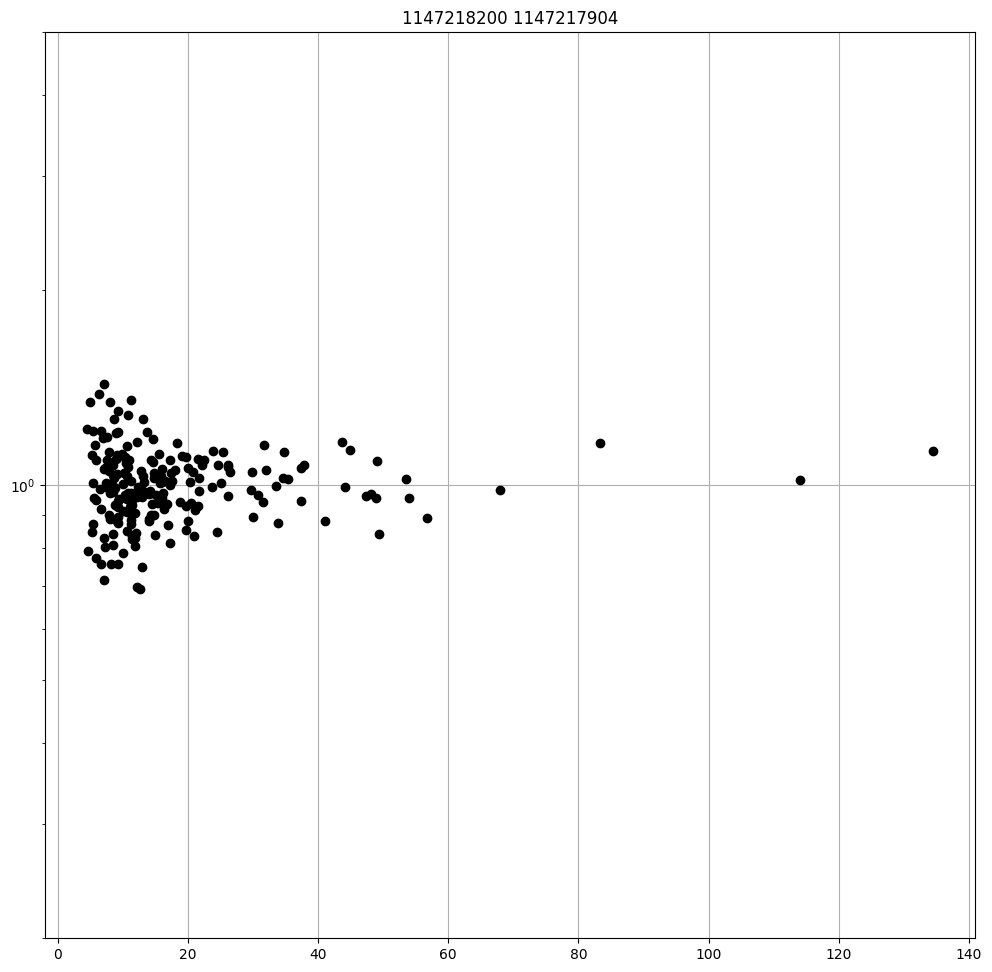

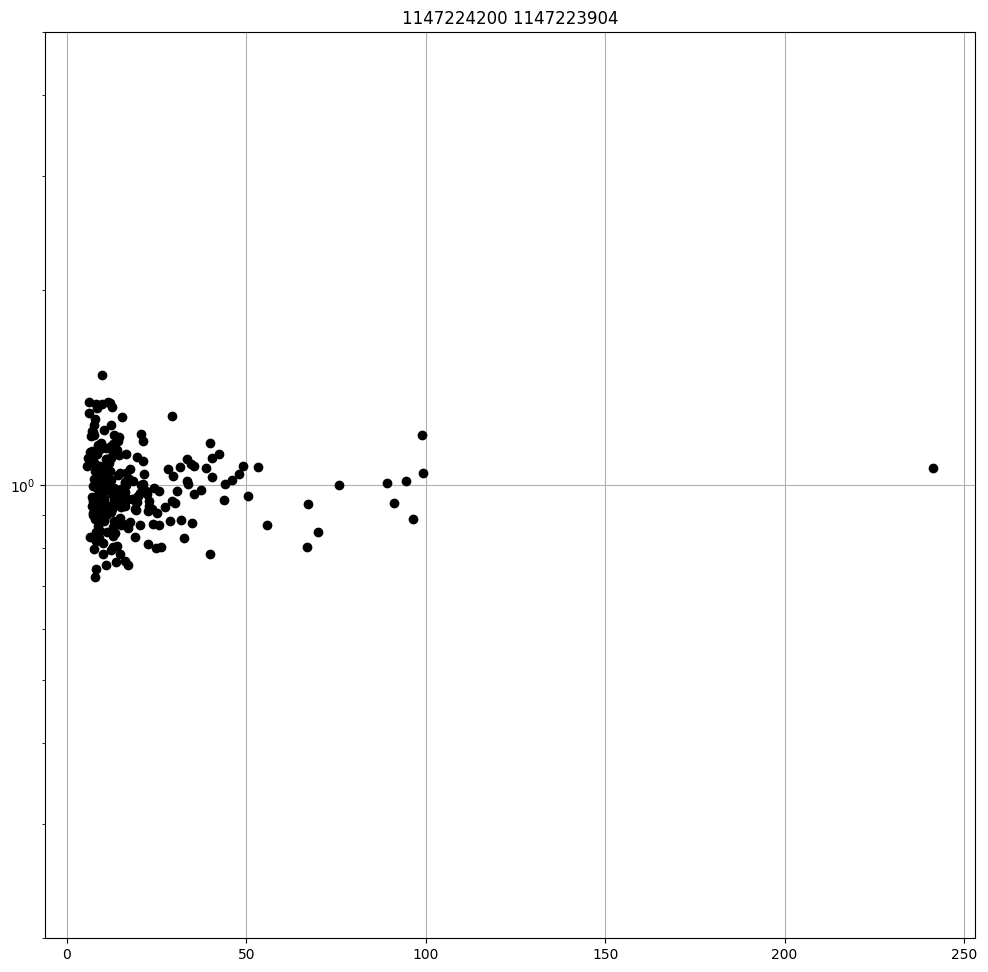

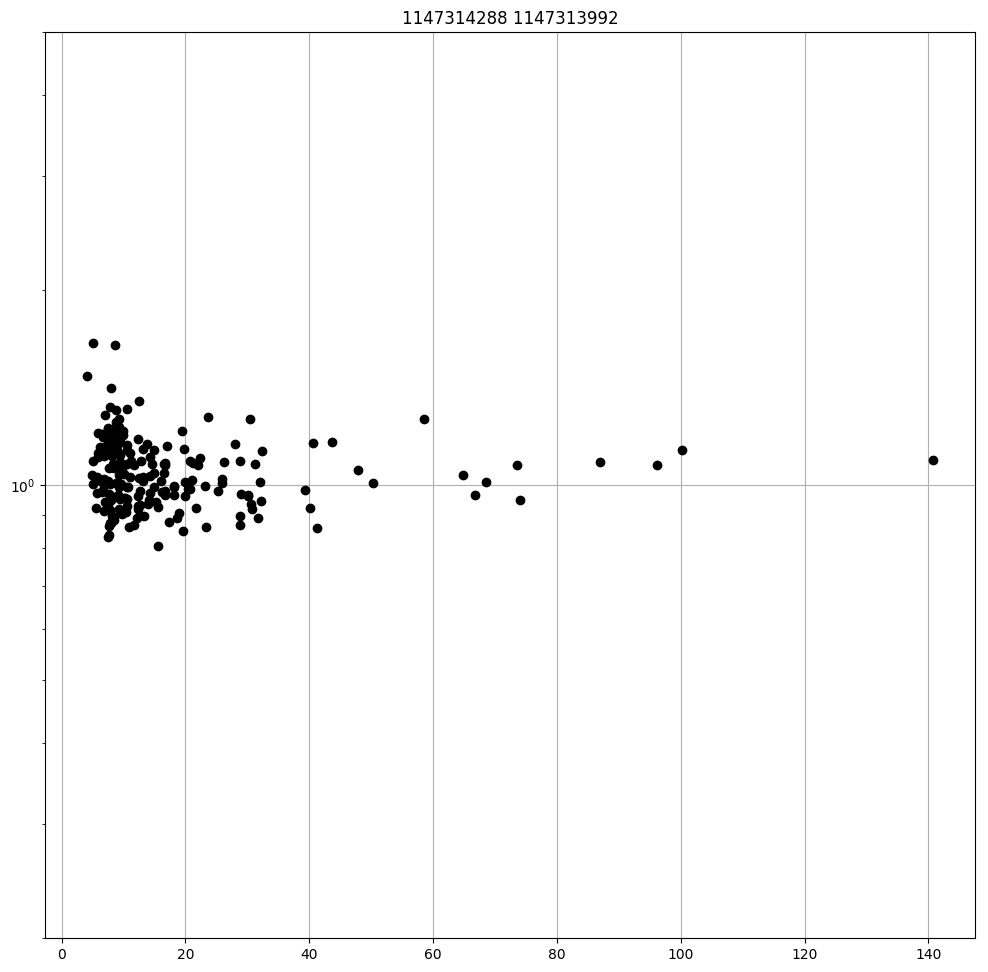

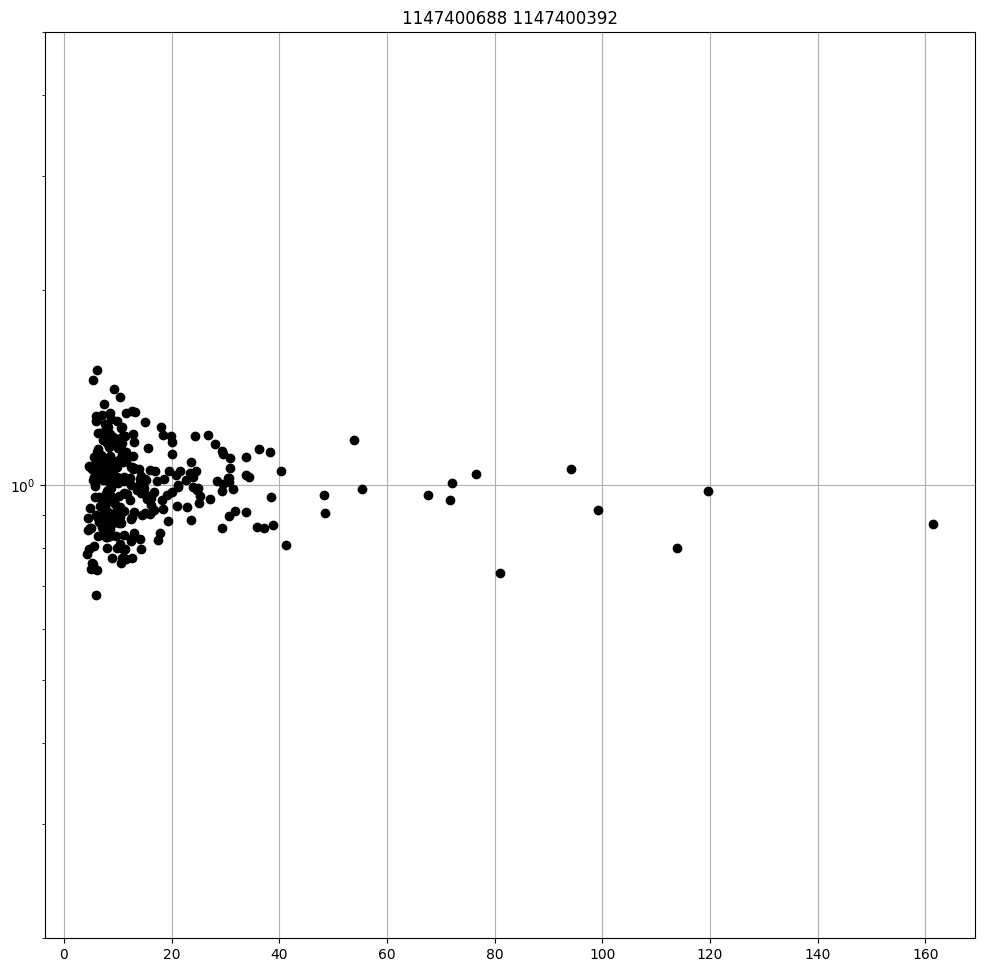

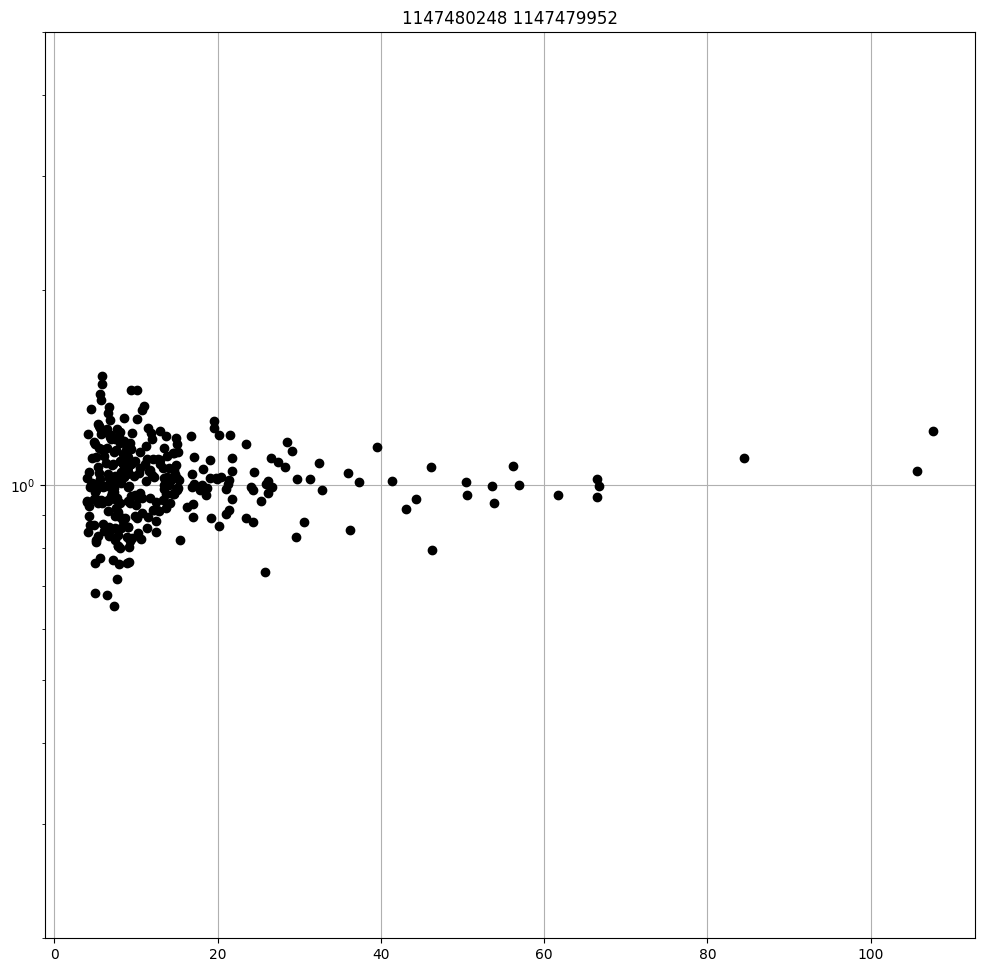

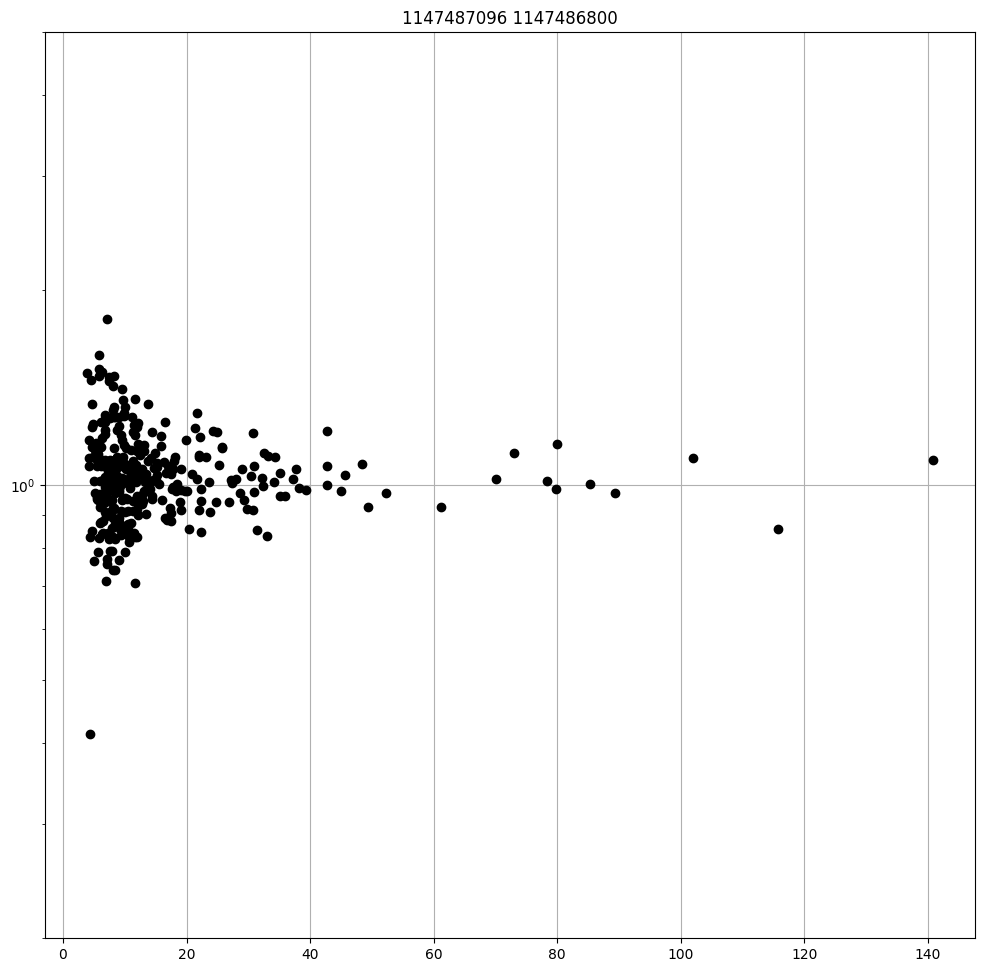

In [33]:
for i in range(len(o1_cats)):
    plt.figure(figsize=(12.0, 12.0))
    snr1 = o1_cats[i]['nsi']/o1_cats[i]['err_nsi']
    snr2 = o2_cats[i]['nsi']/o2_cats[i]['err_nsi']
    snr = (snr1**-2 + snr2**-2)**-0.5
    ratio = o2_cats[i]['nsi']/o1_cats[i]['nsi']
    plt.semilogy(snr, ratio, 'o', color='black')
    plt.title(obsids2[i]+' '+obsids1tho[i])
    plt.ylim((0.2, 5))
    plt.grid()